In [49]:
%cd /content/drive/MyDrive/intern

/content/drive/MyDrive/intern


In [50]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# GET DATA

In [51]:
with open('train_source.txt', 'r') as f:
    raw_data = f.readlines()

with open('train_target.txt', 'r') as f:
    raw_target = f.readlines()

In [52]:
with open('test_source.txt', 'r') as f:
    raw_test_data = f.readlines()

with open('test_target.txt', 'r') as f:
    raw_test_target = f.readlines()

In [53]:
data = []
for line in raw_data:
    data.append([x for x in line.split()])

target = []
for line in raw_target:
    target.append([x for x in line.split()])

In [54]:
test_data = []
for line in raw_test_data:
    test_data.append([x for x in line.split()])

test_target = []
for line in raw_test_target:
    test_target.append([x for x in line.split()])

# ANALYZING FUNCTIONS

In [55]:
def n_gram(n, data):
    word_list = {}
    pos_list = {}
    for line in data:
        for i in range(len(line) - n + 1):
            x = tuple(line[i:i+n])
            if x not in word_list:
                word_list[x] = 0
                pos_list[x] = []
            word_list[x] += 1
            pos = i / len(line) * 100
            pos_list[x].append(pos)

    return word_list, pos_list

In [56]:
def search_rows_by_ngram(data, word_list):
    indices = []
    # indices = {}
    for i, line in enumerate(data):
        if ' '.join(word_list) in ' '.join(line):
            indices.append(i)
            # indices[i] = line
    return indices

In [57]:
def get_positions(n, data, min_num):
    pos_lists = {}
    for i in range(1, n+1):
        tmp, pos = n_gram(i, data)
        selected_pos = {k: pos[k] for k, v in tmp.items() if v >= min_num}
        pos_lists.update(selected_pos)
    return pos_lists

# VOCAB SIZE

In [58]:
train_total_words, _ = n_gram(1, data)
train_target_total_words, _ = n_gram(1, target)

test_total_words, _ = n_gram(1, test_data)
test_target_total_words, _ = n_gram(1, test_target)

In [60]:
print(f'train_source: {len(train_total_words)}, train_target: {len(train_target_total_words)}')
print(f'test_source: {len(test_total_words)}, test_target: {len(test_target_total_words)}')

train_source: 53, train_target: 595
test_source: 45, test_target: 495


In [ ]:
print(set(test_total_words.keys()).difference(set(train_total_words.keys())))

set()


In [ ]:
print(set(test_target_total_words.keys()).difference(set(train_target_total_words.keys())))

{('325',), ('418',), ('477',), ('160',), ('428',), ('308',), ('422',), ('2',), ('502',), ('141',), ('332',), ('262',)}


In [ ]:
print({x: test_target_total_words[x] for x in set(test_target_total_words.keys()).difference(set(train_target_total_words.keys()))})

{('325',): 2, ('418',): 3, ('477',): 1, ('160',): 3, ('428',): 1, ('308',): 2, ('422',): 1, ('2',): 1, ('502',): 1, ('141',): 1, ('332',): 1, ('262',): 1}


# MEASURE N-GRAM

In [ ]:
data_word_list, _ = n_gram(12, data)

In [ ]:
data_word_list = {k: v for k, v in data_word_list.items() if v >= 100}

In [ ]:
print(data_word_list)

{('105', '453', '271', '68', '416', '105', '619', '437', '68', '140', '584', '68'): 122}


In [ ]:
target_word_list, _ = n_gram(8, target)

In [ ]:
target_word_list = {k: v for k, v in target_word_list.items() if v >= 100}

In [ ]:
print(target_word_list)

{('607', '339', '68', '550', '501', '68', '397', '68'): 117}


## MATCHING BIGGEST N-GRAM

In [ ]:
k_list = {}
for k, v in word_list.items():
    k_list[k] = search_rows_by_ngram(data, k)

In [ ]:
for k, v in k_list.items():
    print(k, v)

('105', '453', '271', '68', '416', '105', '619', '437', '68', '140', '584', '68') [19, 46, 157, 256, 329, 361, 405, 439, 449, 482, 483, 500, 579, 655, 698, 820, 834, 977, 1010, 1151, 1195, 1219, 1269, 1311, 1478, 1489, 1526, 1567, 1641, 1759, 1874, 1877, 1947, 2041, 2089, 2113, 2187, 2233, 2353, 2420, 2422, 2458, 2492, 2542, 2683, 2705, 2745, 2754, 2833, 2901, 2951, 2985, 3064, 3203, 3258, 3314, 3318, 3338, 3357, 3499, 3523, 3524, 3538, 3566, 3581, 3657, 3857, 4043, 4045, 4061, 4098, 4159, 4175, 4214, 4231, 4310, 4425, 4457, 4539, 4547, 4562, 4647, 4779, 4869, 4888, 4921, 4932, 4933, 4944, 5088, 5190, 5316, 5324, 5358, 5408, 5419, 5459, 5495, 5545, 5703, 5741, 5829, 5876, 5935, 5952, 5960, 5963, 6002, 6018, 6031, 6036, 6141, 6155, 6326, 6414, 6423, 6544, 6559, 6731, 6831, 7030, 7096]


In [ ]:
matched_target = {}
for k, v in k_list.items():
    t = [target[x] for x in v]
    matched_target[k] = t

In [ ]:
for k, vs in matched_target.items():
    print(f'key: {k}')
    for v in vs:
        print(v)

key: ('105', '453', '271', '68', '416', '105', '619', '437', '68', '140', '584', '68')
['607', '339', '68', '550', '501', '68', '397', '68', '538', '430', '68', '640', '68', '241', '68', '51', '558', '68', '523', '405', '85']
['607', '339', '68', '550', '501', '68', '397', '68', '538', '430', '68', '640', '68', '241', '194', '68', '272', '247', '270']
['607', '339', '68', '550', '501', '68', '397', '68', '211', '543', '68', '43', '158', '68', '252', '155', '149', '68', '97', '68', '189', '68', '70', '158', '68', '563', '189', '68', '657', '299']
['607', '339', '68', '550', '501', '68', '397', '68', '201', '85', '152', '68', '5', '68', '397', '68', '211', '295', '334', '569', '68', '43', '158', '68', '570', '389', '158', '149']
['607', '339', '68', '550', '501', '68', '397', '68', '538', '430', '68', '640', '68', '241', '68', '430', '299', '655', '68', '523', '405', '85']
['607', '339', '68', '550', '501', '68', '397', '68', '365', '430', '199', '68', '43', '158', '68', '389', '349', '5

## TOKEN POSITION

In [ ]:
pos_lists = get_positions(1, data, 0)

In [ ]:
# for k, vs in pos_lists.items():
#     print(f'key: {k}', end=' - ')
#     start = 0
#     middle = 0
#     end = 0
#     for v in vs:
#         if v <= 33:
#             start += 1
#         elif v <= 66:
#             middle += 1
#         else:
#             end += 1
#     print(f'freq: {start+middle+end}', end=' - ')
#     print(f'start: {start/(start+middle+end)*100:.02f}%, middle: {middle/(start+middle+end)*100:.02f}%, end: {end/(start+middle+end)*100:.02f}%')
#     # print(f'{v:.02f}', end=', ')

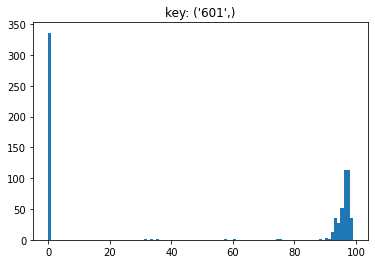

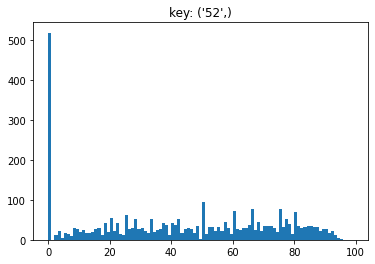

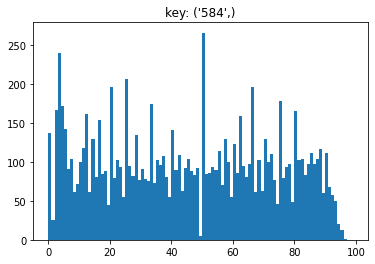

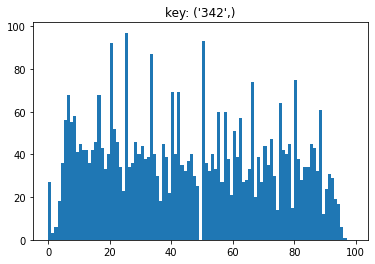

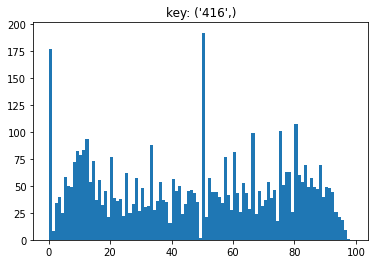

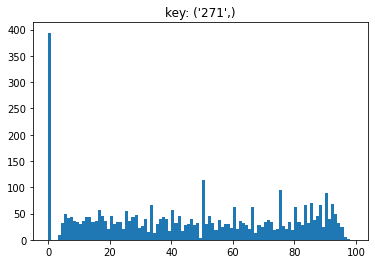

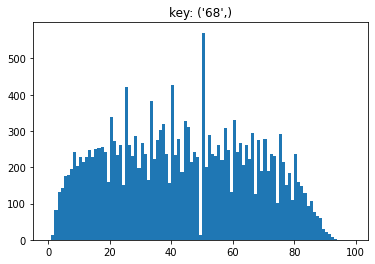

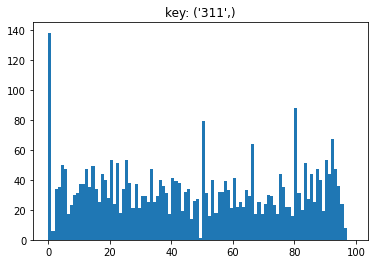

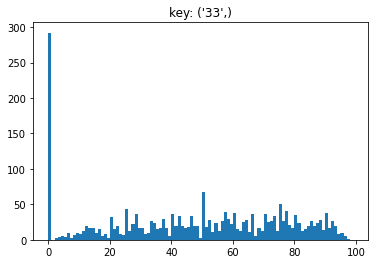

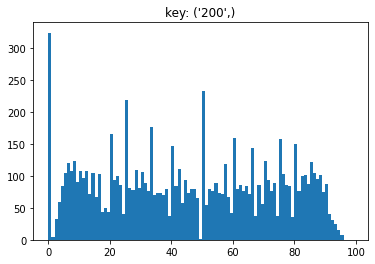

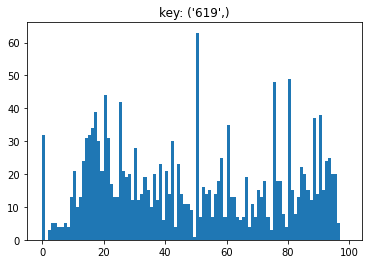

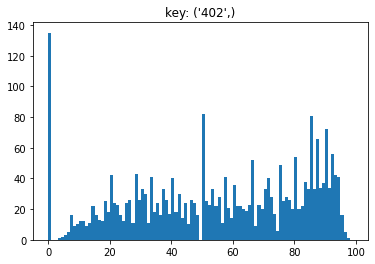

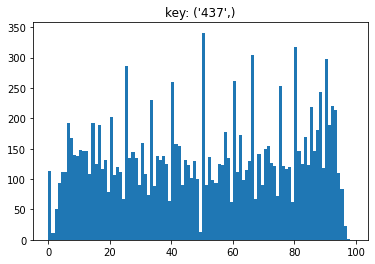

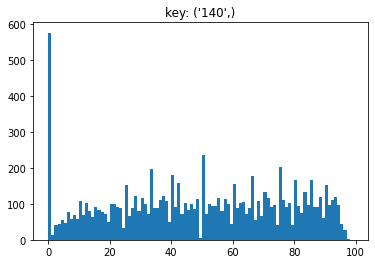

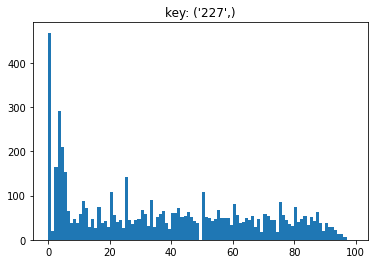

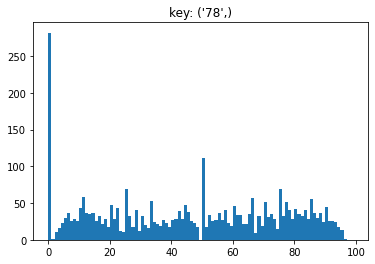

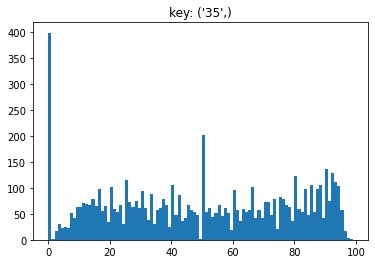

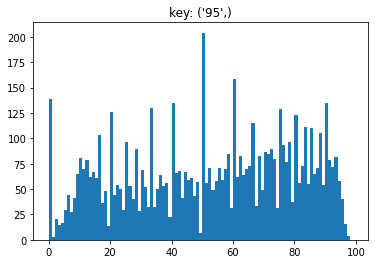

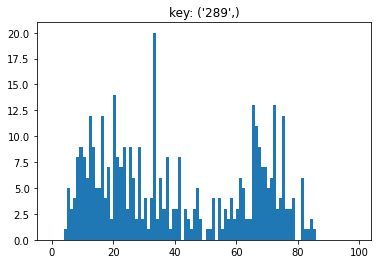

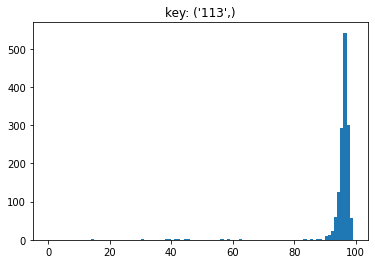

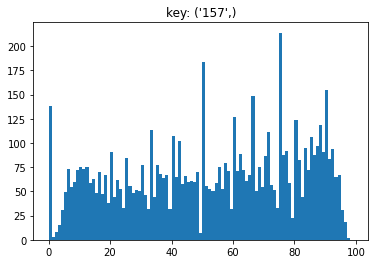

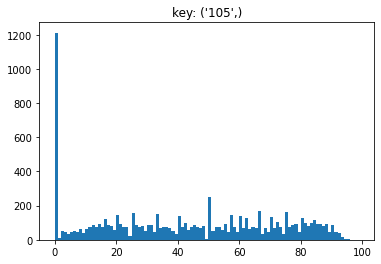

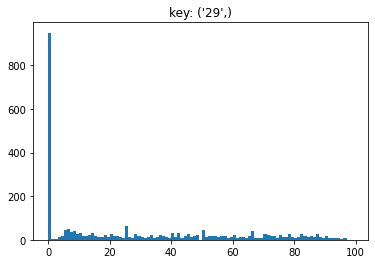

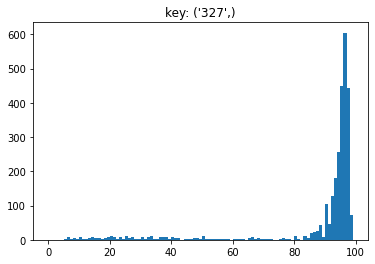

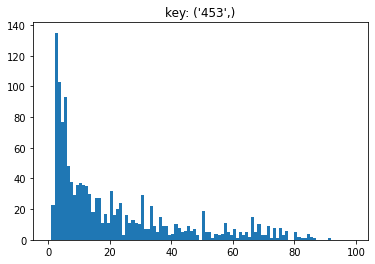

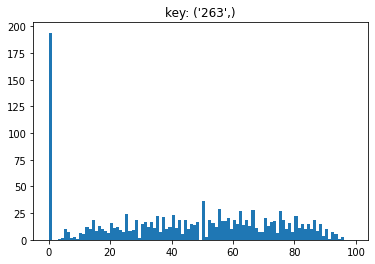

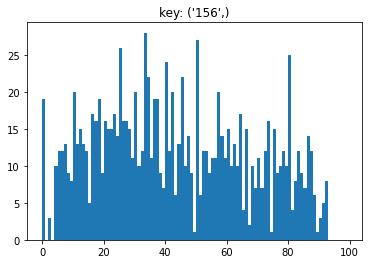

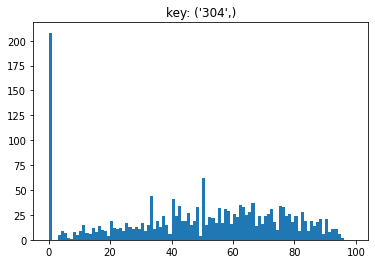

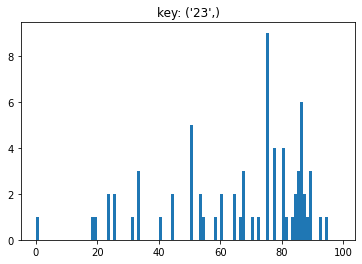

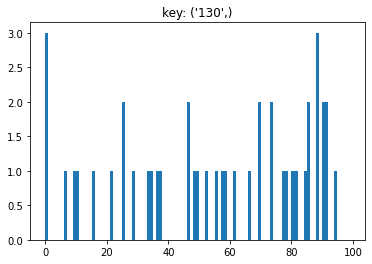

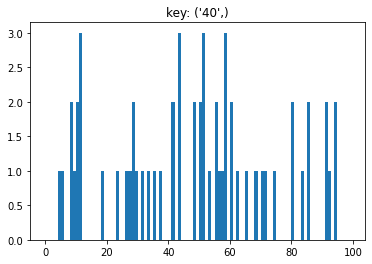

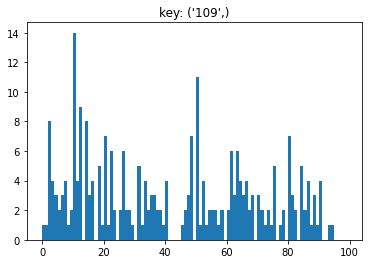

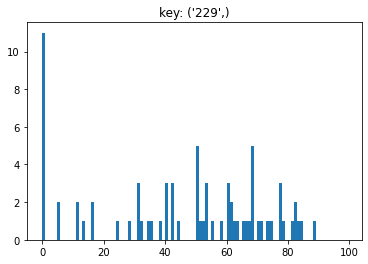

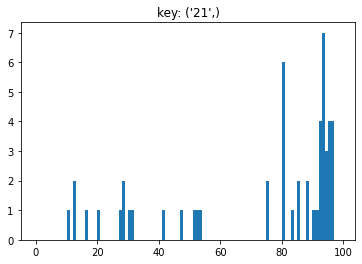

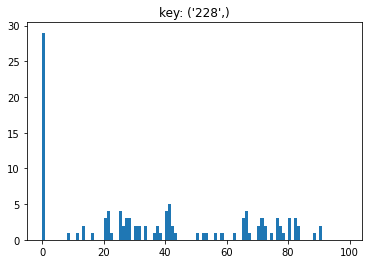

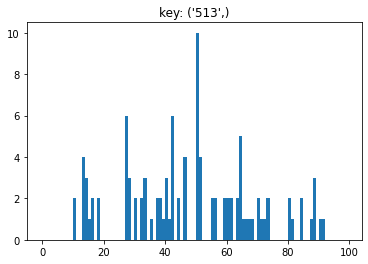

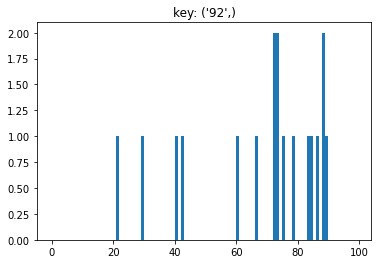

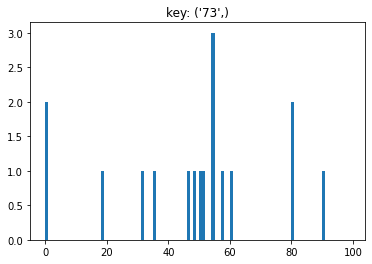

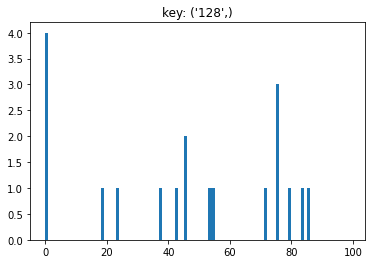

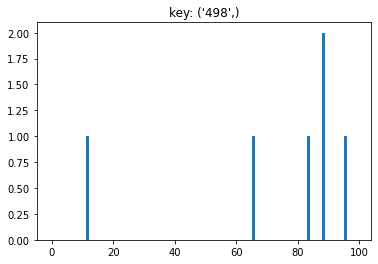

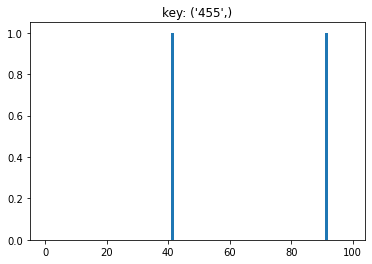

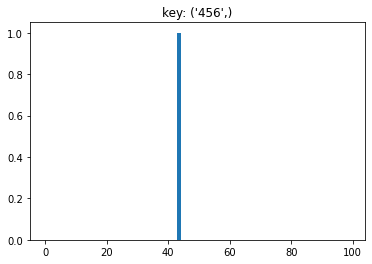

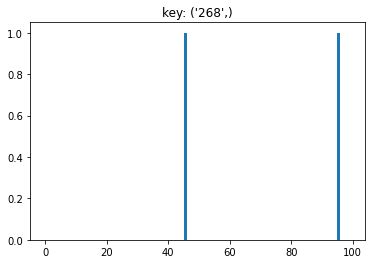

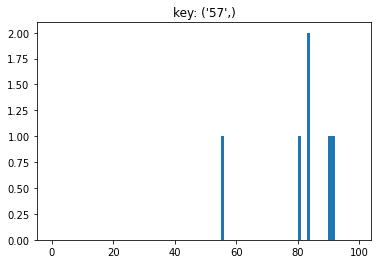

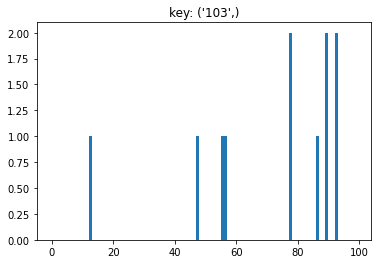

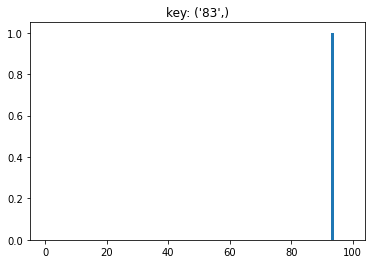

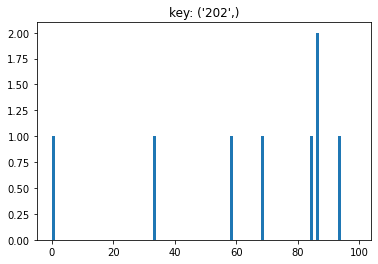

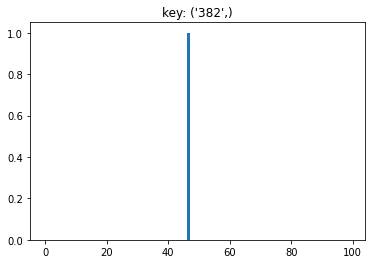

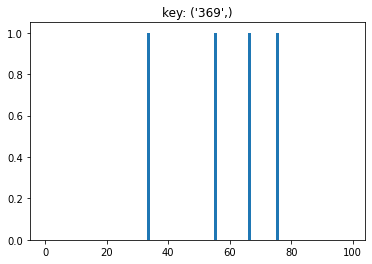

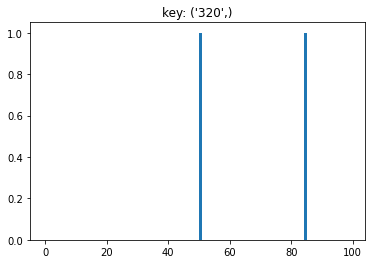

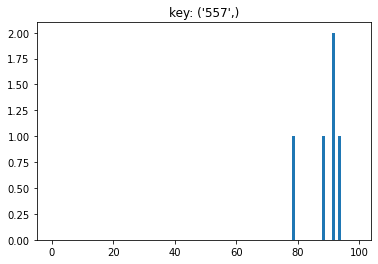

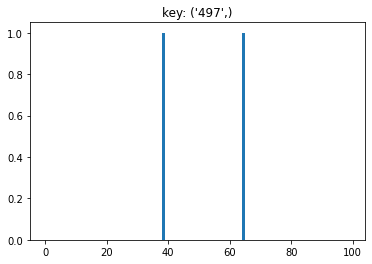

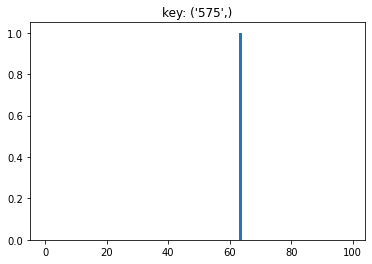

In [ ]:
for k, vs in pos_lists.items():
    plt.hist(vs, bins=list(range(100)))
    plt.title(f'key: {k}')
    plt.show()

# UNSEEN CASE STUDY

In [ ]:
unseen_words = {x[0] for x in set(test_total_words.keys()).difference(set(train_total_words.keys()))}
unseen_target_words = {x[0] for x in set(test_target_total_words.keys()).difference(set(train_target_total_words.keys()))}

In [ ]:
unseen_words

set()

In [ ]:
repr(sorted(list(unseen_target_words), key=lambda x: int(x)))

"['2', '141', '160', '262', '308', '325', '332', '418', '422', '428', '477', '502']"

In [ ]:
sentence_with_unseen_words = {i: x for i, x in enumerate(test_target) if len(set(x).intersection(unseen_target_words)) > 0}
len(sentence_with_unseen_words)

18

In [ ]:
sentence_with_unseen_words.keys()

dict_keys([62, 82, 418, 452, 628, 905, 963, 1216, 1224, 1234, 1247, 1421, 1607, 1628, 1659, 1681, 1691, 1720])

In [ ]:
' '.join(sentence_with_unseen_words[82])

'505 211 68 85 160 149'